In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from insightface.app import FaceAnalysis

In [2]:
# configure faceanalysis
faceapp = FaceAnalysis(name='buffalo_sc',
                       root='insightface_model',
                       providers=['CPUExecutionProvider'])

faceapp.prepare(ctx_id=0, det_size=(640,640), det_thresh=0.5)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_sc\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_sc\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [3]:
# faceapp.get(, max_num=1)

In [4]:
import re

In [5]:
def clean_name(string):
    # remove special char
    string = re.sub(r'[^A-Za-z]',' ',string)
    string = string.title()
    return string

In [6]:
person_info = []
listdir = os.listdir(path='images')
for folder_name in listdir:
    role, name = folder_name.split('-')
    name = clean_name(name)
    role = clean_name(role)
    #print('Role =',role,end='\t')
    #print('Name =',name)

    # extract path of each images in each folder
    img_files = os.listdir(path= f'images/{folder_name}')
    for file in img_files:
        path = f'./images/{folder_name}/{file}'
        
        # step-1: read the image
        img_arr = cv2.imread(path)

        # step-2: get the faceapp info
        result = faceapp.get(img_arr, max_num=1)  #return list

        if len(result)>0:
            # step-3: extract the facial features
            res = result[0]
            embedding = res['embedding']
            # step-4: save all info in a list
            person_info.append([name, role, embedding])

In [7]:
dataframe = pd.DataFrame(person_info, columns=['Name', 'Role', 'Facial_Features'])
dataframe #store in redis

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[-0.840976, 1.6623011, -0.74578035, -2.1380825..."
1,Angelina Jolie,Student,"[0.09012404, -0.4169108, -0.37650695, 0.424011..."
2,Angelina Jolie,Student,"[0.86389506, 0.32952017, 0.05781859, -1.453824..."
3,Angelina Jolie,Student,"[1.6611172, 1.1610862, -0.41079235, -2.6411536..."
4,Angelina Jolie,Student,"[0.864314, 0.9437618, 0.4265172, -1.1836909, -..."
5,Angelina Jolie,Student,"[0.41072488, 1.1821749, -0.9955386, -1.4014187..."
6,Angelina Jolie,Student,"[0.4228965, 2.084679, 1.0648315, -2.2739332, -..."
7,Angelina Jolie,Student,"[0.39441854, 0.844123, -0.6154812, -2.104783, ..."
8,Angelina Jolie,Student,"[1.0931159, 1.16805, -0.2896319, -2.0099528, -..."
9,Angelina Jolie,Student,"[-0.63542634, 1.7897139, 0.59832734, -3.550089..."


In [8]:
# step-1: read test image
img_test = cv2.imread('test_images/test_2.jpeg')
cv2.imshow('test_image', img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
# step-2: feature extraction
res_test = faceapp.get(img_test,max_num=0)
for i, rt in enumerate(res_test):
    print('current iteration:',i)
    bbox = rt['bbox'].astype(int)
    score = int(rt['det_score']*100)
    embed_test = rt['embedding']
    

current iteration: 0


In [10]:
embed_test

array([ 1.62806642e+00, -1.96355581e+00, -1.37185144e+00, -8.69040608e-01,
        2.90507841e+00,  1.85686183e+00, -5.80029130e-01,  5.83240330e-01,
        1.36582673e+00,  5.33366323e-01, -3.68373126e-01, -2.82464415e-01,
        1.02649403e+00, -2.38686249e-01, -1.05997288e+00, -4.24371123e-01,
        1.17060132e-01,  2.41708374e+00,  1.48359168e+00, -1.05015337e+00,
        8.95056665e-01, -7.30184555e-01,  1.94570065e+00,  1.09795833e+00,
       -4.29821223e-01, -1.91715908e+00,  8.90947819e-01, -8.87030482e-01,
       -2.15987515e+00,  1.01065433e+00,  1.35444772e+00, -4.99872327e-01,
        9.57490385e-01,  8.86132360e-01,  6.63977146e-01, -1.88996673e-01,
        8.58868897e-01,  1.03638864e+00,  2.09360266e+00,  8.41285586e-02,
       -2.35990906e+00,  1.24004841e+00,  1.22737348e+00,  4.18336362e-01,
        1.24372840e+00,  1.55598462e-01,  2.03220427e-01,  5.02663016e-01,
        1.17408979e+00,  6.46878839e-01, -6.41105175e-01, -2.02721691e+00,
        3.13182831e-01, -

In [11]:
len(embed_test)

512

In [12]:
dataframe.head()

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[-0.840976, 1.6623011, -0.74578035, -2.1380825..."
1,Angelina Jolie,Student,"[0.09012404, -0.4169108, -0.37650695, 0.424011..."
2,Angelina Jolie,Student,"[0.86389506, 0.32952017, 0.05781859, -1.453824..."
3,Angelina Jolie,Student,"[1.6611172, 1.1610862, -0.41079235, -2.6411536..."
4,Angelina Jolie,Student,"[0.864314, 0.9437618, 0.4265172, -1.1836909, -..."


In [13]:
X_list = dataframe['Facial_Features'].tolist()
X = np.asarray(X_list)

In [14]:
X.shape

(50, 512)

In [15]:
from sklearn.metrics import pairwise

In [16]:
y = embed_test.reshape(1,512) # 1 x 512 row vector

euclidean_distance = pairwise.euclidean_distances(X, y)
manhattan_distance = pairwise.manhattan_distances(X, y)
cosine_similar = pairwise.cosine_similarity(X, y)

In [17]:
data_search = dataframe.copy()
data_search['euclidean'] = euclidean_distance
data_search['manhattan'] = manhattan_distance
data_search['cosine'] = cosine_similar

In [18]:
data_search.head(2)

,Name,Role,Facial_Features,euclidean,manhattan,cosine
0,Angelina Jolie,Student,"[-0.840976, 1.6623011, -0.74578035, -2.1380825...",32.55088,589.697205,-0.000401
1,Angelina Jolie,Student,"[0.09012404, -0.4169108, -0.37650695, 0.424011...",31.70570,585.808898,0.067606


In [19]:
import matplotlib.pyplot as plt

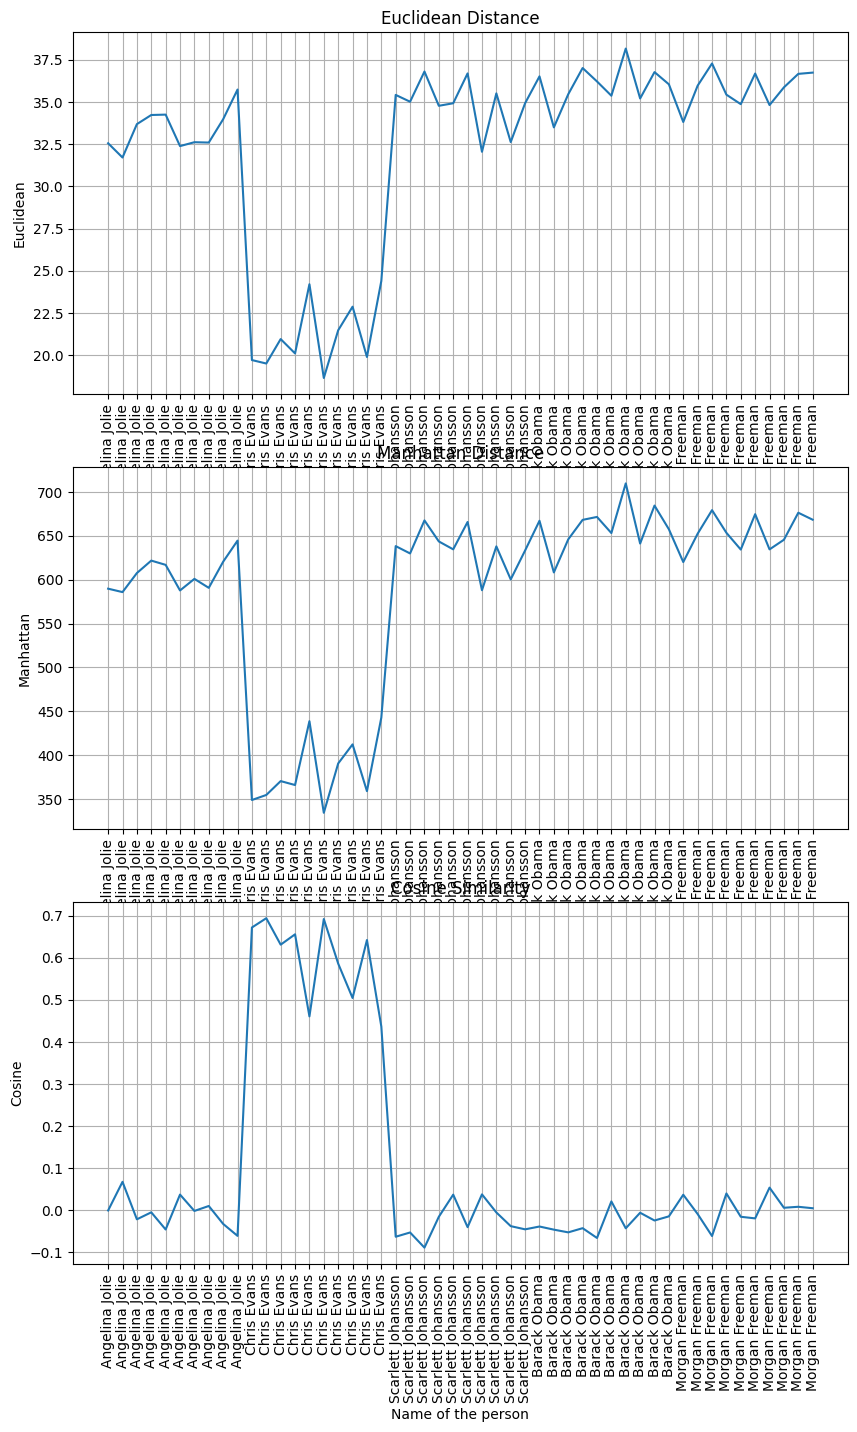

In [20]:
plt.figure(figsize=(10,16))
plt.subplot(3,1,1)
plt.plot(data_search['euclidean'])
plt.xticks(ticks=list(range(len(data_search['euclidean']))), 
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the person')
plt.ylabel('Euclidean')
plt.title('Euclidean Distance')
plt.grid()

plt.subplot(3,1,2)
plt.plot(data_search['manhattan'])
plt.xticks(ticks=list(range(len(data_search['manhattan']))), 
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the person')
plt.ylabel('Manhattan')
plt.title('Manhattan Distance')
plt.grid()

plt.subplot(3,1,3)
plt.plot(data_search['cosine'])
plt.xticks(ticks=list(range(len(data_search['cosine']))), 
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the person')
plt.ylabel('Cosine')
plt.title('Cosine Similarity')
plt.grid()


plt.show()

In [21]:
# identify person name using euclidean distance
d_eq_optimal = 25

In [22]:
datafilter = data_search.query(f'euclidean < {d_eq_optimal}')
datafilter.reset_index(drop=True, inplace=True)

if len(datafilter)>0:
    argmin = datafilter['euclidean'].argmin()
    name, role = datafilter.loc[argmin][['Name', 'Role']]

else:
    name = 'Unknown'
    role = 'Unknown'

In [23]:
print(name, role)

Chris Evans Student


In [24]:
# identify person name using manhattan distance
d_man_optimal = 450

In [25]:
datafilter_man = data_search.query(f'manhattan < {d_man_optimal}')
datafilter_man.reset_index(drop=True, inplace=True)

if len(datafilter_man)>0:
    argmin = datafilter_man['manhattan'].argmin()
    name_man, role_man = datafilter_man.loc[argmin][['Name', 'Role']]

else:
    name_man = 'Unknown'
    role_man = 'Unknown'

In [26]:
print(name_man, role_man)

Chris Evans Student


In [27]:
# identify person name using cosine similarity
s_optimal = 0.4

In [28]:
datafilter_cos = data_search.query(f'cosine > {s_optimal}')
datafilter_cos.reset_index(drop=True, inplace=True)

if len(datafilter_cos)>0:
    argmax = datafilter_cos['cosine'].argmax()
    name_cos, role_cos = datafilter_cos.loc[argmax][['Name', 'Role']]

else:
    name_cos = 'Unknown'
    role_cos = 'Unknown'

In [29]:
print(name_cos, role_cos)

Chris Evans Student


In [30]:
datafilter_cos

,Name,Role,Facial_Features,euclidean,manhattan,cosine
0,Chris Evans,Student,"[1.8046337, -2.301599, -1.5814648, -1.1037462,...",19.704737,348.967131,0.671635
1,Chris Evans,Student,"[1.7499522, -2.120638, -0.15303323, -0.9053567...",19.500280,354.706662,0.693673
2,Chris Evans,Student,"[0.44954258, -1.6314547, -0.95116156, -1.54259...",20.948902,370.496888,0.630839
3,Chris Evans,Student,"[0.8585786, -1.1000845, -0.7710812, -1.4918342...",20.098198,366.029654,0.655420
4,Chris Evans,Student,"[-1.1621715, -0.68589675, -0.43853605, -2.8765...",24.199448,438.784851,0.460519
5,Chris Evans,Student,"[0.35355112, -0.69770634, -0.30065766, -1.9116...",18.643534,334.386540,0.691777
6,Chris Evans,Student,"[1.3115609, -2.0907722, -1.0405229, -1.7980812...",21.469744,390.588748,0.585914
7,Chris Evans,Student,"[0.9714033, -1.7574674, -1.3090365, -1.0256081...",22.867329,412.332011,0.504220
8,Chris Evans,Student,"[0.5908869, -1.415056, -0.6726382, -1.310897, ...",19.886080,359.061218,0.641870
9,Chris Evans,Student,"[0.27377757, -0.8834741, -0.56312096, -0.63476...",24.391943,442.847989,0.436431


In [31]:
argmax

1

#### identifying multiple person in an image

In [32]:
def ml_search_algorithm(dataframe, feature_column, test_vector, 
                        name_role=['Name','Role'], thresh=0.5):
    """
    cosine similarity based search algo
    """
    # step-1: take the dataframe (collection of data)
    dataframe = dataframe.copy()
    
    # step-2: index face embedding from the df & convert into array
    X_list = dataframe[feature_column].tolist()
    x = np.asarray(X_list)
    
    # step-3: calculate cosine similarity
    similar = pairwise.cosine_similarity(x, test_vector.reshape(1,-1)) #1x512
    similar_arr = np.array(similar).flatten()
    dataframe['cosine'] = similar_arr
    
    # step-4: filterthe data
    data_filter = dataframe.query(f'cosine >= {thresh}')
    if len(data_filter) > 0:
        # step-5: get the person name
        data_filter.reset_index(drop=True, inplace=True)
        argmax = data_filter['cosine'].argmax()
        person_name, person_role = data_filter.loc[argmax][name_role]
    
    else:
        person_name = 'Unknown'
        person_role = 'Unknown'


    return person_name, person_role
    

In [33]:
test_image = cv2.imread('test_images/test_2.jpeg')
cv2.imshow('test_image', test_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
# step-1: take the test image & apply to insightface
results = faceapp.get(test_image)
test_copy = test_image.copy()

# step-2: use for loop & extract each embeddings & pass to ml search algo
for res in results:
    x1, y1, x2, y2 = res['bbox'].astype(int)
    embeddings = res['embedding']
    person_name, person_role = ml_search_algorithm(dataframe_compress, 
                                                   'Facial_Features', 
                                                   test_vector=embeddings,
                                                   name_role=['Name', 'Role'],
                                                   thresh=0.5)
    if person_name == 'Unknown':
        color = (0,0,255) #bgr
    else:
        color = (0,255,0)

    
    cv2.rectangle(test_copy,(x1,y1),(x2,y2),color)

    text_gen = person_name
    cv2.putText(test_copy,text_gen,(x1,y1),cv2.FONT_HERSHEY_DUPLEX, 0.7, color,2)


cv2.imshow('test image',test_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
dataframe.head(2)

### compressing the dataset

In [35]:
dataframe_compress = dataframe.groupby(by=['Name','Role']).mean()
dataframe_compress.reset_index(inplace=True)
dataframe_compress

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[0.43242034, 1.0748498, -0.12862365, -1.833291..."
1,Barack Obama,Teacher,"[0.94858104, -0.5584052, 0.094820715, -1.27965..."
2,Chris Evans,Student,"[0.7201715, -1.4684149, -0.7781253, -1.4601073..."
3,Morgan Freeman,Teacher,"[0.48535103, -0.6192555, -0.4069932, 1.0687788..."
4,Scarlett Johansson,Student,"[0.19131963, -0.48843804, -1.690233, 0.4423967..."


#### convert dataframe into array & save in numpy zip form

In [37]:
xvalues = dataframe_compress.values
xvalues

array([['Angelina Jolie', 'Student',
        array([ 4.32420343e-01,  1.07484984e+00, -1.28623649e-01, -1.83329177e+00,
               -7.27802396e-01, -1.23429465e+00, -2.34313130e-01, -3.72791916e-01,
               -6.96481943e-01, -3.52696538e-01, -1.86347470e-01, -8.56500149e-01,
               -7.25770116e-01,  1.59811723e+00,  1.89706221e-01, -8.70287344e-02,
               -8.61652046e-02,  9.59016308e-02, -4.32294518e-01,  5.76181002e-02,
                1.06183112e-01, -1.08450246e+00, -3.68749082e-01, -3.46378684e-01,
                5.48185408e-01, -3.21397752e-01,  1.65740907e+00,  3.66979212e-01,
                9.40395176e-01,  1.18225420e+00,  4.02732939e-01,  5.15204966e-01,
                2.07558203e+00, -1.63649404e+00, -1.61218062e-01, -9.74149257e-02,
               -7.65306175e-01,  7.55763650e-01, -1.70574951e+00,  2.01980740e-01,
               -1.64433122e+00,  5.47630787e-01,  2.28763938e-01, -3.25343072e-01,
                1.90978810e-01,  3.11371267e-01, -

In [38]:
col_name = np.array(dataframe_compress.columns)
col_name

array(['Name', 'Role', 'Facial_Features'], dtype=object)

In [39]:
np.savez('dataframe_students_teacher.npz', xvalues, col_name)

In [40]:
# load the numpy zip
file_np = np.load('dataframe_students_teacher.npz', allow_pickle=True)
file_np.files

['arr_0', 'arr_1']

In [41]:
pd.DataFrame(file_np['arr_0'],columns=file_np['arr_1'])

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[0.43242034, 1.0748498, -0.12862365, -1.833291..."
1,Barack Obama,Teacher,"[0.94858104, -0.5584052, 0.094820715, -1.27965..."
2,Chris Evans,Student,"[0.7201715, -1.4684149, -0.7781253, -1.4601073..."
3,Morgan Freeman,Teacher,"[0.48535103, -0.6192555, -0.4069932, 1.0687788..."
4,Scarlett Johansson,Student,"[0.19131963, -0.48843804, -1.690233, 0.4423967..."
